Cell 1: Importing libraries...
✓ All libraries imported successfully!

Cell 2: Setting up paths...
Session directory: C:\Users\VIJAY BHUSHAN SINGH\depression_detection_project\data\raw\DAIC-WOZ\300_P
Directory exists: True

Files to process:
  Audio: True - C:\Users\VIJAY BHUSHAN SINGH\depression_detection_project\data\raw\DAIC-WOZ\300_P\300_AUDIO.wav
  Transcript: True - C:\Users\VIJAY BHUSHAN SINGH\depression_detection_project\data\raw\DAIC-WOZ\300_P\300_TRANSCRIPT.csv

Cell 3: Loading audio file...
✓ Audio loaded!
  Sample rate: 16000 Hz
  Duration: 648.50 seconds (10.81 minutes)
  Total samples: 10,376,000


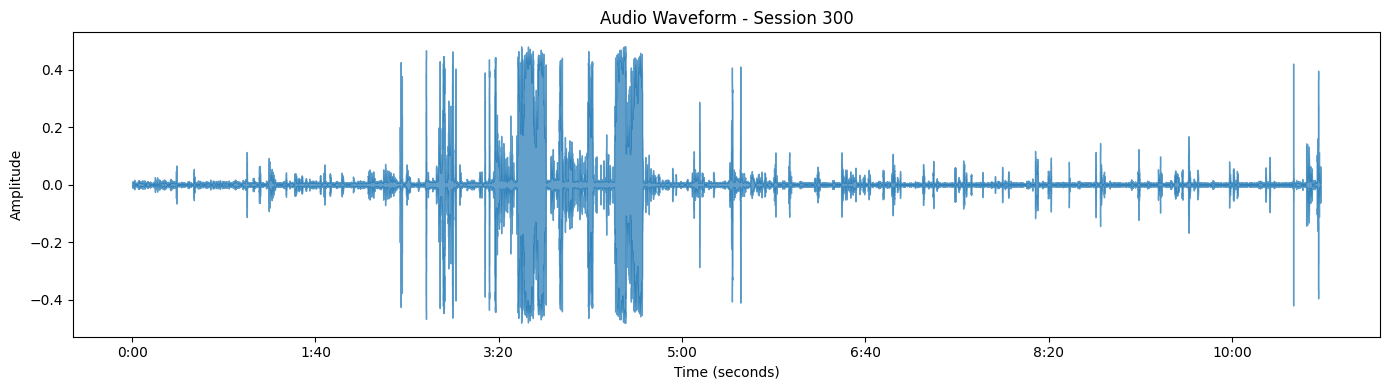

✓ Waveform displayed!

Cell 4: Extracting audio features...
✓ MFCCs extracted: shape (13, 20266)
  (13 coefficients × 20266 time frames)

MFCC Statistics:
  Mean of first MFCC: -420.8195
  Std of first MFCC: 115.9602


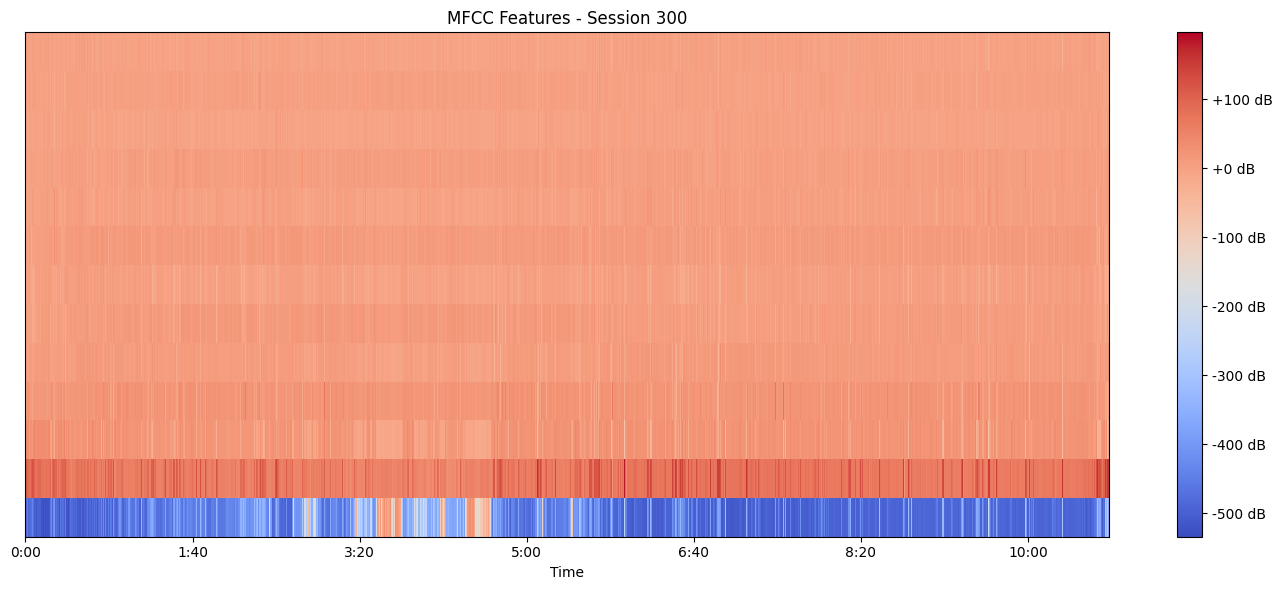


Extracting pitch...
✓ Pitch extracted: 20136 valid frames
  Average pitch: 143.51 Hz
  Pitch range: 51.19 - 402.32 Hz


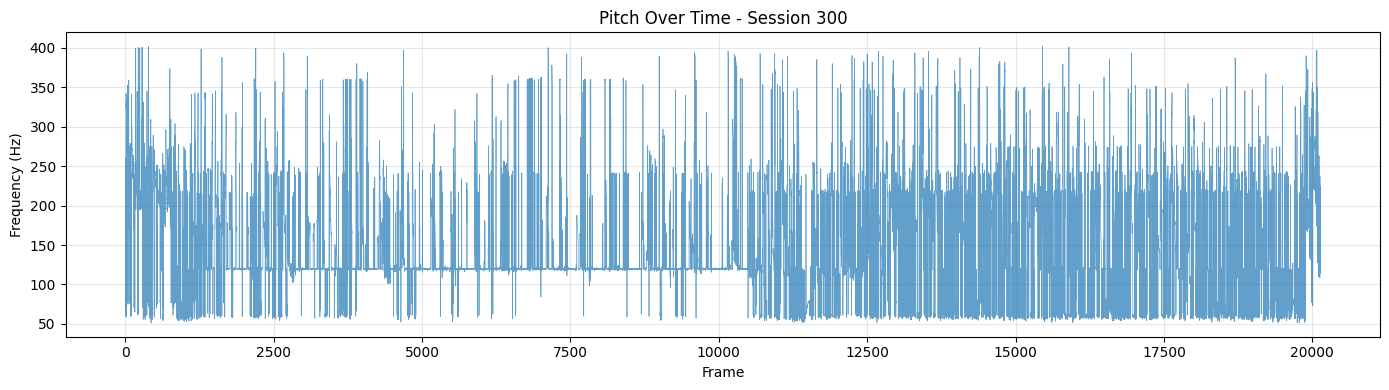


Extracting energy...
✓ Energy extracted
  Average energy: 0.010082

Cell 5: Loading transcript...
✓ Transcript loaded!
  Shape: (174, 1)
  Columns: ['start_time\tstop_time\tspeaker\tvalue']

First few rows:


,start_time\tstop_time\tspeaker\tvalue
0,36.588\t39.668\tEllie\thi i'm ellie thanks for...
1,39.888\t43.378\tEllie\ti was created to talk t...
2,43.728\t48.498\tEllie\tthink of me as a friend...
3,49.188\t52.388\tEllie\ti'm here to learn about...
4,52.658\t58.958\tEllie\ti'll ask a few question...
5,60.028\t61.378\tEllie\thow are you doing today
6,62.328\t63.178\tParticipant\tgood
7,63.798\t64.738\tEllie\tthat's good
8,65.858\t67.528\tEllie\twhere are you from orig...
9,68.978\t70.288\tParticipant\tatlanta georgia


⚠ No 'speaker' column found. Showing available columns:
['start_time\tstop_time\tspeaker\tvalue']

Cell 6: Checking OpenFace features...
Found 6 OpenFace files:
  - 300_CLNF_AUs.txt (2125.7 KB)
  - 300_CLNF_features.txt (23492.8 KB)
  - 300_CLNF_features3D.txt (35625.6 KB)
  - 300_CLNF_gaze.txt (2916.7 KB)
  - 300_CLNF_hog.txt (339602.9 KB)
  - 300_CLNF_pose.txt (1637.0 KB)
⚠ Could not find features file

SUMMARY: Session 300 Check

✓ Audio:
  - Duration: 648.50 seconds
  - Average pitch: 143.51 Hz
  - Average energy: 0.010082

✓ Text:

✓ Video:
  - OpenFace files found: 6

✅ Single session check COMPLETE!
All modalities are accessible and can be processed.

Next: Run Notebook 2 to extract features from ALL sessions


In [3]:
"""
NOTEBOOK 1: Check Single Session (300_P)
This notebook verifies that we can load and process one session correctly

SAVE THIS AS: notebooks/exploratory/04_check_single_session.ipynb

HOW TO USE:
1. Open Jupyter Lab
2. Navigate to notebooks/exploratory/
3. Create new notebook: File → New → Notebook
4. Copy ALL cells below into the notebook
5. Run cell by cell (Shift + Enter)
"""

# ========== CELL 1: Import Libraries ==========
print("Cell 1: Importing libraries...")

import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

print("✓ All libraries imported successfully!")

# ========== CELL 2: Define Paths ==========
print("\nCell 2: Setting up paths...")

# Your data directory
DATA_DIR = Path(r'C:\Users\VIJAY BHUSHAN SINGH\depression_detection_project\data\raw\DAIC-WOZ')

# Test with session 300
SESSION_ID = '300'
SESSION_DIR = DATA_DIR / f'{SESSION_ID}_P'

# File paths
AUDIO_FILE = SESSION_DIR / f'{SESSION_ID}_AUDIO.wav'
TRANSCRIPT_FILE = SESSION_DIR / f'{SESSION_ID}_TRANSCRIPT.csv'


print(f"Session directory: {SESSION_DIR}")
print(f"Directory exists: {SESSION_DIR.exists()}")
print(f"\nFiles to process:")
print(f"  Audio: {AUDIO_FILE.exists()} - {AUDIO_FILE}")
print(f"  Transcript: {TRANSCRIPT_FILE.exists()} - {TRANSCRIPT_FILE}")

# ========== CELL 3: Load and Visualize Audio ==========
print("\nCell 3: Loading audio file...")

# Load audio
audio, sr = librosa.load(AUDIO_FILE, sr=16000)

print(f"✓ Audio loaded!")
print(f"  Sample rate: {sr} Hz")
print(f"  Duration: {len(audio)/sr:.2f} seconds ({len(audio)/sr/60:.2f} minutes)")
print(f"  Total samples: {len(audio):,}")

# Visualize waveform
plt.figure(figsize=(14, 4))
librosa.display.waveshow(audio, sr=sr, alpha=0.7)
plt.title(f'Audio Waveform - Session {SESSION_ID}')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

print("✓ Waveform displayed!")

# ========== CELL 4: Extract Basic Audio Features ==========
print("\nCell 4: Extracting audio features...")

# Extract MFCCs
mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
print(f"✓ MFCCs extracted: shape {mfccs.shape}")
print(f"  (13 coefficients × {mfccs.shape[1]} time frames)")

# Calculate statistics
mfcc_mean = np.mean(mfccs, axis=1)
mfcc_std = np.std(mfccs, axis=1)

print(f"\nMFCC Statistics:")
print(f"  Mean of first MFCC: {mfcc_mean[0]:.4f}")
print(f"  Std of first MFCC: {mfcc_std[0]:.4f}")

# Visualize MFCCs
plt.figure(figsize=(14, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title(f'MFCC Features - Session {SESSION_ID}')
plt.tight_layout()
plt.show()

# Extract pitch
print("\nExtracting pitch...")
pitches, magnitudes = librosa.piptrack(y=audio, sr=sr, fmin=50, fmax=400)

# Get pitch values
pitch_values = []
for t in range(pitches.shape[1]):
    index = magnitudes[:, t].argmax()
    pitch = pitches[index, t]
    if pitch > 0:
        pitch_values.append(pitch)

pitch_values = np.array(pitch_values)

print(f"✓ Pitch extracted: {len(pitch_values)} valid frames")
print(f"  Average pitch: {np.mean(pitch_values):.2f} Hz")
print(f"  Pitch range: {np.min(pitch_values):.2f} - {np.max(pitch_values):.2f} Hz")

# Visualize pitch
plt.figure(figsize=(14, 4))
plt.plot(pitch_values, linewidth=0.5, alpha=0.7)
plt.title(f'Pitch Over Time - Session {SESSION_ID}')
plt.xlabel('Frame')
plt.ylabel('Frequency (Hz)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Extract energy
print("\nExtracting energy...")
rms = librosa.feature.rms(y=audio)[0]

print(f"✓ Energy extracted")
print(f"  Average energy: {np.mean(rms):.6f}")

# ========== CELL 5: Load and Check Transcript ==========
print("\nCell 5: Loading transcript...")

# Load transcript (it's in CSV format)
transcript_df = pd.read_csv(TRANSCRIPT_FILE)

print(f"✓ Transcript loaded!")
print(f"  Shape: {transcript_df.shape}")
print(f"  Columns: {list(transcript_df.columns)}")

print("\nFirst few rows:")
display(transcript_df.head(10))

# Get participant's text only
if 'speaker' in transcript_df.columns:
    participant_df = transcript_df[transcript_df['speaker'] == 'Participant']
    print(f"\n✓ Participant utterances: {len(participant_df)}")
    
    # Combine all participant text
    participant_text = ' '.join(participant_df['value'].astype(str).tolist())
    print(f"✓ Total participant text length: {len(participant_text)} characters")
    
    print(f"\nSample participant text:")
    print(participant_text[:500] + "...")
else:
    print("⚠ No 'speaker' column found. Showing available columns:")
    print(transcript_df.columns.tolist())

# ========== CELL 6: Check Video Features (OpenFace) ==========
print("\nCell 6: Checking OpenFace features...")

# Look for OpenFace files
openface_files = list(SESSION_DIR.glob('*_CLNF_*'))

print(f"Found {len(openface_files)} OpenFace files:")
for file in openface_files:
    print(f"  - {file.name} ({file.stat().st_size / 1024:.1f} KB)")

# Load one OpenFace file
if openface_files:
    # Load features file
    openface_file = SESSION_DIR / f'{SESSION_ID}_CLNF_features'
    
    if openface_file.exists():
        # These are usually space-separated
        openface_df = pd.read_csv(openface_file, sep=',', engine='python')
        
        print(f"\n✓ OpenFace features loaded!")
        print(f"  Shape: {openface_df.shape}")
        print(f"  Columns: {len(openface_df.columns)}")
        
        print(f"\nFirst few columns:")
        print(openface_df.columns[:10].tolist())
        
        print(f"\nFirst few rows:")
        display(openface_df.head())
    else:
        print(f"⚠ Could not find features file")
else:
    print("⚠ No OpenFace files found")

# ========== CELL 7: Summary ==========
print("\n" + "="*60)
print("SUMMARY: Session 300 Check")
print("="*60)
print("\n✓ Audio:")
print(f"  - Duration: {len(audio)/sr:.2f} seconds")
print(f"  - Average pitch: {np.mean(pitch_values):.2f} Hz")
print(f"  - Average energy: {np.mean(rms):.6f}")

print("\n✓ Text:")
if 'participant_text' in locals():
    print(f"  - Participant utterances: {len(participant_df)}")
    print(f"  - Total characters: {len(participant_text)}")
    print(f"  - Approximate words: {len(participant_text.split())}")

print("\n✓ Video:")
if openface_files:
    print(f"  - OpenFace files found: {len(openface_files)}")
    if 'openface_df' in locals():
        print(f"  - Features shape: {openface_df.shape}")

print("\n" + "="*60)
print("✅ Single session check COMPLETE!")
print("All modalities are accessible and can be processed.")
print("\nNext: Run Notebook 2 to extract features from ALL sessions")
print("="*60)